<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

#**<big><big>Algoritmo Y Programación III</big></big><br><small>Facultad de Ingeniería</small><br><small>_*Proyecto | parte 1*_**

# **Integrantes**
Juan David Acevedo - A00399081

Santiago Santacruz - A00378149

Esteban Cuellar - A00402548

### Instalar dependencias e importarlas

In [66]:
!python -V

# Limpieza y actualización base
!pip install -q --upgrade pip setuptools wheel

# Desinstala copias previas para evitar conflictos
!pip uninstall -y mediapipe protobuf numpy


!pip install -q numpy==1.26.4 protobuf==4.25.3 pyarrow pandas

Python 3.12.12
Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
Found existing installation: protobuf 4.25.3
Uninstalling protobuf-4.25.3:
  Successfully uninstalled protobuf-4.25.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, which is not installed.
tensorflow-decision-forests 1.12.0 requires ydf>=0.11.0, which is not installed.
plotnine 0.14.5 requires mizani~=0.13.0, which is not installed.
plotnine 0.14.5 requires statsmodels>=0.14.0, which is not installed.
pymc 5.26.1 requires pytensor<2.36,>=2.35.0, which is not installed.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, which is not installed.
cuml-cu12 25.6.0 

In [75]:
!pip install -U numpy==1.26.4 scikit-learn==1.4.2 pandas==2.2.2 joblib==1.3.2


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 27.2 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-

In [67]:
!pip install mediapipe

  Using cached mediapipe-0.10.21-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached mediapipe-0.10.21-cp312-cp312-manylinux_2_28_x86_64.whl (35.6 MB)


In [10]:
!pip install -q xgboost==1.7.6

In [68]:
!pip uninstall opencv-python

In [69]:
!pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, which is not installed.
tensorflow-decision-forests 1.12.0 requires ydf>=0.11.0, which is not installed.
plotnine 0.14.5 requires mi

In [21]:
import os, math, json
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import pyarrow as pa, pyarrow.parquet as pq
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import LeaveOneGroupOut , GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score,
    matthews_corrcoef, cohen_kappa_score, make_scorer , classification_report , confusion_matrix
)
from sklearn.base import clone



mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


### Montar drive

In [6]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


### Configurar carpetas de acceso a drive

In [7]:
DRIVE_VIDEOS = "/content/drive/.shortcut-targets-by-id/1FaYueZhUWw_YKYWeT8A9WdoOnLNHlD9q/proyecto/videos"   # aquí van los .mp4/.avi para la muestra
DRIVE_POSES  = "/content/drive/.shortcut-targets-by-id/1FaYueZhUWw_YKYWeT8A9WdoOnLNHlD9q/proyecto/poses"    # aquí se guardarán .parquet y resumen

os.makedirs(DRIVE_VIDEOS, exist_ok=True)
os.makedirs(DRIVE_POSES,  exist_ok=True)

###Recolectar los videos a procesar

In [10]:
VIDEO_EXTS = ("*.mp4","*.avi","*.mov","*.mkv","*.wmv","*.flv")

video_paths = []
for ext in VIDEO_EXTS:
    video_paths += glob.glob(os.path.join(DRIVE_VIDEOS, "**", ext), recursive=True)

video_paths = sorted(video_paths)
print(f"🎬 Videos encontrados: {len(video_paths)}")
for p in video_paths[:10]:
    print(" -", os.path.relpath(p, DRIVE_VIDEOS))
if not video_paths:
    print("No hay videos en", DRIVE_VIDEOS)


🎬 Videos encontrados: 42
 - subject1/sit_front.mp4
 - subject1/sit_side.mp4
 - subject1/stand_front.mp4
 - subject1/stand_side.mp4
 - subject1/walk_back.mp4
 - subject1/walking_away.mp4
 - subject1/walking_to_camera.mp4
 - subject2/sit_front.mp4
 - subject2/sit_side.mp4
 - subject2/stand_front.mp4


### Detección (SMOKE TESTS)

Muestra 1 frame de los primeros N videos ajustados en la variable N_SMOKE

 Smoke test OK en: sit_front.mp4


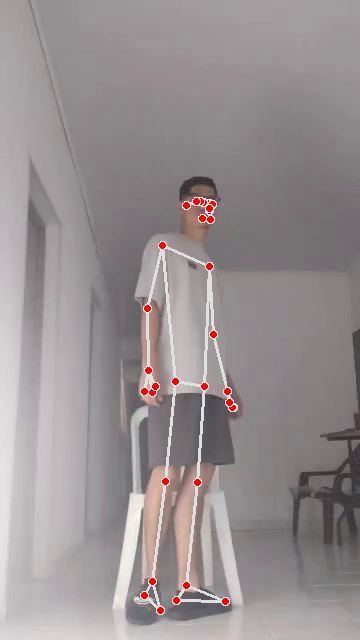

 Smoke test OK en: sit_side.mp4


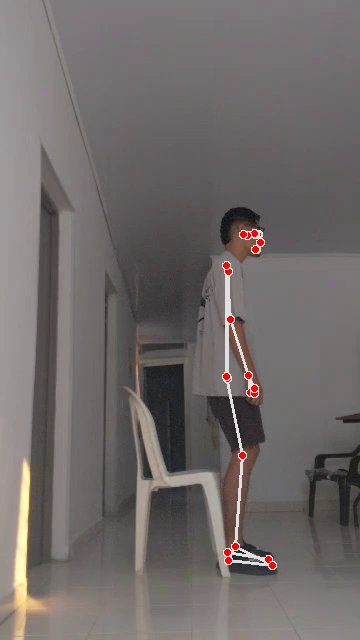

 Smoke test OK en: stand_front.mp4


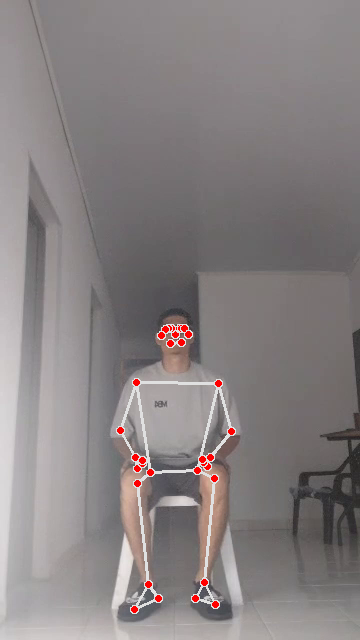

 Smoke test OK en: stand_side.mp4


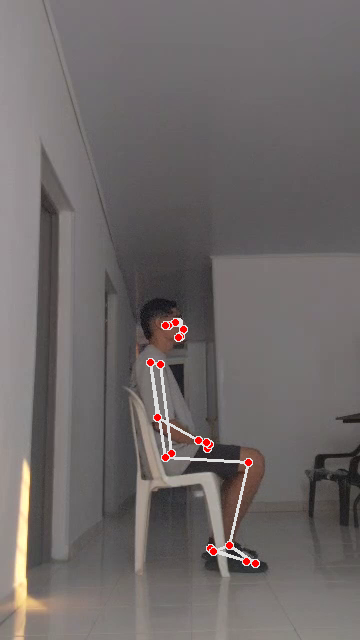

 Sin detección en frame inicial: walk_back.mp4


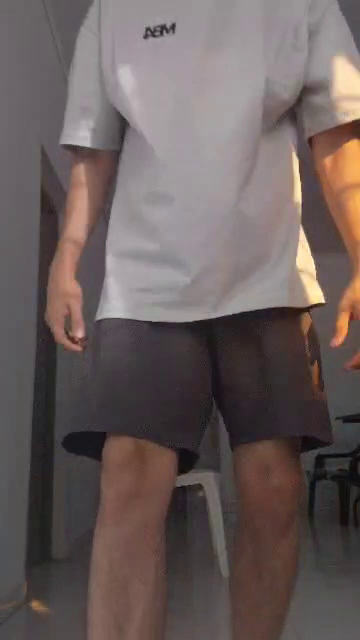

In [12]:
from google.colab.patches import cv2_imshow

N_SMOKE = 5  # cambia2 a 2-3 si se quieren ver más

for i, vp in enumerate(video_paths[:N_SMOKE]):
    cap = cv2.VideoCapture(vp)
    ok, frame = cap.read()
    cap.release()
    if not ok:
        print(f" No pude leer: {os.path.basename(vp)}"); continue

    with mp_pose.Pose(min_detection_confidence=0.5,
                      min_tracking_confidence=0.5) as pose:
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        res = pose.process(rgb)
        bgr = frame.copy()
        if res.pose_landmarks:
            mp_drawing.draw_landmarks(bgr, res.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            print(f" Smoke test OK en: {os.path.basename(vp)}")
        else:
            print(f" Sin detección en frame inicial: {os.path.basename(vp)}")
        cv2_imshow(bgr)


### Guardar landmarks por frame

In [31]:
from pathlib import Path
import re

def normalize_action(name: str) -> str:
    base = name.lower()
    base = re.sub(r"\s+", "_", base)
    base = re.sub(r"\(\d+\)$", "", base)      # quita un (n) final
    base = re.sub(r"_+", "_", base).strip("_")
    return base

def parse_subject_action(p: str):
    parts = Path(p).parts
    subject = parts[-2]                 # carpeta del sujeto
    action  = normalize_action(Path(p).stem)
    return subject, action


In [32]:
def extract_video_to_parquet(in_video: str, out_parquet: str,
                             stride: int = 1,
                             model_complexity: int = 1,
                             min_det: float = 0.5,
                             min_trk: float = 0.5) -> dict:
    mp_pose = mp.solutions.pose
    cap = cv2.VideoCapture(in_video)
    fps = cap.get(cv2.CAP_PROP_FPS) or 24.0
    if fps == 0 or math.isclose(fps, 0.0): fps = 24.0
    W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)); H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    rows, f, miss, LM = [], -1, 0, 33

    with mp_pose.Pose(model_complexity=model_complexity,
                      min_detection_confidence=min_det,
                      min_tracking_confidence=min_trk,
                      smooth_landmarks=True) as pose:
        while True:
            ok, frame = cap.read()
            if not ok: break
            f += 1
            if f % stride != 0: continue
            t = f / fps
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB); rgb.flags.writeable = False
            res = pose.process(rgb)

            x = np.full(LM, np.nan, np.float32)
            y = np.full(LM, np.nan, np.float32)
            v = np.zeros(LM, np.float32)
            if res.pose_landmarks:
                for i, lm in enumerate(res.pose_landmarks.landmark[:LM]):
                    x[i], y[i], v[i] = lm.x * W, lm.y * H, getattr(lm, "visibility", 0.0)
            else:
                miss += 1

            row = {"frame_idx": f, "t_sec": float(t), "width": W, "height": H, "fps": float(fps)}
            for i in range(LM):
                row[f"x_{i}"] = float(x[i]); row[f"y_{i}"] = float(y[i]); row[f"vis_{i}"] = float(v[i])
            rows.append(row)

    cap.release()
    pq.write_table(pa.Table.from_pylist(rows), out_parquet)

    return {
        "video": os.path.basename(in_video),
        "parquet": os.path.basename(out_parquet),
        "frames": len(rows), "miss_frames": miss, "fps": float(fps),
        "width": int(W), "height": int(H),
        "stride": int(stride), "model_complexity": int(model_complexity),
        "min_det": float(min_det), "min_trk": float(min_trk),
    }


### Procesar los videos y guardar un resumen en CSV

In [33]:

summaries = []
for vp in video_paths:
    subj, act = parse_subject_action(vp)
    base = Path(vp).stem.replace(" ", "_")
    out_name = f"{subj}__{act}__{base}.parquet"   # nombre único y trazable
    out_parquet = str(Path(DRIVE_POSES) / out_name)

    print(f"Procesando [{subj} / {act}] -> {os.path.basename(vp)}")
    info = extract_video_to_parquet(
        vp, out_parquet, stride=1, model_complexity=1, min_det=0.5, min_trk=0.5
    )
    # añade metadatos
    info["subject"] = subj
    info["action"]  = act
    info["video_relpath"] = os.path.relpath(vp, DRIVE_VIDEOS)
    summaries.append(info)

summary_df = pd.DataFrame(summaries)
summary_csv = os.path.join(DRIVE_POSES, "poses_summary.csv")
summary_df.to_csv(summary_csv, index=False)

print("\n✅ Resumen guardado en:", summary_csv)
display(summary_df.head())


Procesando [subject1 / sit_front] -> sit_front.mp4
Procesando [subject1 / sit_side] -> sit_side.mp4
Procesando [subject1 / stand_front] -> stand_front.mp4
Procesando [subject1 / stand_side] -> stand_side.mp4
Procesando [subject1 / walk_back] -> walk_back.mp4
Procesando [subject1 / walking_away] -> walking_away.mp4
Procesando [subject1 / walking_to_camera] -> walking_to_camera.mp4
Procesando [subject2 / sit_front] -> sit_front.mp4
Procesando [subject2 / sit_side] -> sit_side.mp4
Procesando [subject2 / stand_front] -> stand_front.mp4
Procesando [subject2 / stand_side] -> stand_side.mp4
Procesando [subject2 / walk_back] -> walk_back.mp4
Procesando [subject2 / walking_away] -> walking_away.mp4
Procesando [subject2 / walking_to_camera] -> walking_to_camera.mp4
Procesando [subject3 / sit_front] -> sit_front.mp4
Procesando [subject3 / sit_side] -> sit_side.mp4
Procesando [subject3 / stand_front] -> stand_front.mp4
Procesando [subject3 / stand_site] -> stand_site.mp4
Procesando [subject3 / wal

,video,parquet,frames,miss_frames,fps,width,height,stride,model_complexity,min_det,min_trk,subject,action,video_relpath
0,sit_front.mp4,subject1__sit_front__sit_front.parquet,94,0,30.182820,360,640,1,1,0.5,0.5,subject1,sit_front,subject1/sit_front.mp4
1,sit_side.mp4,subject1__sit_side__sit_side.parquet,121,0,29.564423,360,640,1,1,0.5,0.5,subject1,sit_side,subject1/sit_side.mp4
2,stand_front.mp4,subject1__stand_front__stand_front.parquet,207,0,29.935055,360,640,1,1,0.5,0.5,subject1,stand_front,subject1/stand_front.mp4
3,stand_side.mp4,subject1__stand_side__stand_side.parquet,134,0,29.585340,360,640,1,1,0.5,0.5,subject1,stand_side,subject1/stand_side.mp4
4,walk_back.mp4,subject1__walk_back__walk_back.parquet,138,6,29.671518,360,640,1,1,0.5,0.5,subject1,walk_back,subject1/walk_back.mp4


In [34]:
display(summary_df)

,video,parquet,frames,miss_frames,fps,width,height,stride,model_complexity,min_det,min_trk,subject,action,video_relpath
0,sit_front.mp4,subject1__sit_front__sit_front.parquet,94,0,30.182820,360,640,1,1,0.5,0.5,subject1,sit_front,subject1/sit_front.mp4
1,sit_side.mp4,subject1__sit_side__sit_side.parquet,121,0,29.564423,360,640,1,1,0.5,0.5,subject1,sit_side,subject1/sit_side.mp4
2,stand_front.mp4,subject1__stand_front__stand_front.parquet,207,0,29.935055,360,640,1,1,0.5,0.5,subject1,stand_front,subject1/stand_front.mp4
3,stand_side.mp4,subject1__stand_side__stand_side.parquet,134,0,29.585340,360,640,1,1,0.5,0.5,subject1,stand_side,subject1/stand_side.mp4
4,walk_back.mp4,subject1__walk_back__walk_back.parquet,138,6,29.671518,360,640,1,1,0.5,0.5,subject1,walk_back,subject1/walk_back.mp4
5,walking_away.mp4,subject1__walking_away__walking_away.parquet,169,0,29.886702,478,850,1,1,0.5,0.5,subject1,walking_away,subject1/walking_away.mp4
6,walking_to_camera.mp4,subject1__walking_to_camera__walking_to_camera...,153,0,29.869586,478,850,1,1,0.5,0.5,subject1,walking_to_camera,subject1/walking_to_camera.mp4
7,sit_front.mp4,subject2__sit_front__sit_front.parquet,97,0,30.000000,480,864,1,1,0.5,0.5,subject2,sit_front,subject2/sit_front.mp4
8,sit_side.mp4,subject2__sit_side__sit_side.parquet,84,0,30.000000,480,864,1,1,0.5,0.5,subject2,sit_side,subject2/sit_side.mp4
9,stand_front.mp4,subject2__stand_front__stand_front.parquet,73,0,30.000000,480,864,1,1,0.5,0.5,subject2,stand_front,subject2/stand_front.mp4


### Abrir un parquet generado

In [35]:
# Carga el primero que se haya creado y mira columnas/filas
generated_parquets = sorted(glob.glob(os.path.join(DRIVE_POSES, "*.parquet")))
print("Parquet generados:", len(generated_parquets))
if generated_parquets:
    test_pq = generated_parquets[0]
    print("Mostrando:", os.path.basename(test_pq))
    df = pd.read_parquet(test_pq)
    display(df.head())
    print(df.shape)


Parquet generados: 53
Mostrando: sit_front.parquet


,frame_idx,t_sec,width,height,fps,x_0,y_0,vis_0,x_1,y_1,...,vis_29,x_30,y_30,vis_30,x_31,y_31,vis_31,x_32,y_32,vis_32
0,0,0.000000,480,848,30.218551,230.327240,264.468597,0.999918,231.809174,258.488922,...,0.936870,206.333298,507.502319,0.894147,255.659042,517.465637,0.983211,201.444077,526.427979,0.985055
1,1,0.033092,480,848,30.218551,230.263702,264.382538,0.999911,231.817291,258.488342,...,0.934099,209.528091,507.413177,0.895117,255.705215,517.464722,0.982699,201.567398,525.709290,0.984728
2,2,0.066185,480,848,30.218551,228.911011,264.358276,0.999910,231.256439,258.484924,...,0.929736,211.047897,507.042694,0.893918,255.700958,518.119202,0.982202,201.866150,525.678894,0.984137
3,3,0.099277,480,848,30.218551,227.544388,264.387970,0.999914,230.491882,258.522064,...,0.912346,213.431702,502.804504,0.879587,251.996979,518.258301,0.979924,202.791275,524.934753,0.979874
4,4,0.132369,480,848,30.218551,226.784897,264.402527,0.999918,230.001450,258.566742,...,0.893605,213.691193,502.198212,0.868577,247.977020,518.775940,0.977484,203.373581,524.290283,0.976094


(60, 104)


Se observan valores NAN o Con 0s porque los primeros frames no tienen detección, para verificar que si se estan tomando frames validos, realizamos una consulta de un parquet

###Consulta de frames validos

In [36]:
pq_path = "/content/drive/.shortcut-targets-by-id/1FaYueZhUWw_YKYWeT8A9WdoOnLNHlD9q/proyecto/poses/walk_back.parquet"
df = pd.read_parquet(pq_path)

LM = 33
# fila del primer frame con detección (cualquier landmark no-NaN)
mask_has_pose = ~df[[f"x_{i}" for i in range(LM)]].isna().all(axis=1)
first_ok_idx = mask_has_pose.idxmax() if mask_has_pose.any() else None

print("shape:", df.shape)
print("frames con al menos 1 landmark:", int(mask_has_pose.sum()), "/", len(df))
print("primer frame OK:", first_ok_idx)


if first_ok_idx is not None:
    display(df.loc[max(0, first_ok_idx-2): first_ok_idx+2, ["frame_idx","t_sec","x_11","y_11","vis_11","x_23","y_23","vis_23"]])


shape: (94, 104)
frames con al menos 1 landmark: 94 / 94
primer frame OK: 0


,frame_idx,t_sec,x_11,y_11,vis_11,x_23,y_23,vis_23
0,0,0.000000,489.635834,201.719330,0.999988,426.082947,634.102844,0.999446
1,1,0.033333,485.957733,201.416000,0.999986,426.020752,656.566284,0.999410
2,2,0.066667,479.480103,202.014221,0.999986,424.125732,668.499390,0.999388


### Carga un parquet específico

In [37]:
pq_path = os.path.join(DRIVE_POSES, "walk_back.parquet")  # cambia por el que quieras
df = pd.read_parquet(pq_path)

# columnas esperadas
cols_x = [f"x_{i}" for i in range(LM)]
cols_y = [f"y_{i}" for i in range(LM)]
cols_v = [f"vis_{i}" for i in range(LM) if f"vis_{i}" in df.columns]  # por si no están

print("shape:", df.shape)
print("Tiene columnas x_i?", set(cols_x).issubset(df.columns))
print("Tiene columnas y_i?", set(cols_y).issubset(df.columns))
print("Tiene columnas vis_i?", len(cols_v)==LM)

mask_has_pose = ~df[cols_x].isna().all(axis=1)
first_ok_idx = mask_has_pose.idxmax() if mask_has_pose.any() else None
print("frames con al menos 1 landmark:", int(mask_has_pose.sum()), "/", len(df))
print("primer frame OK:", first_ok_idx)

if first_ok_idx is not None:
    display(df.loc[max(0, first_ok_idx-2): first_ok_idx+2,
                   ["frame_idx","t_sec","x_11","y_11","vis_11","x_23","y_23","vis_23"]])


shape: (94, 104)
Tiene columnas x_i? True
Tiene columnas y_i? True
Tiene columnas vis_i? True
frames con al menos 1 landmark: 94 / 94
primer frame OK: 0


,frame_idx,t_sec,x_11,y_11,vis_11,x_23,y_23,vis_23
0,0,0.000000,489.635834,201.719330,0.999988,426.082947,634.102844,0.999446
1,1,0.033333,485.957733,201.416000,0.999986,426.020752,656.566284,0.999410
2,2,0.066667,479.480103,202.014221,0.999986,424.125732,668.499390,0.999388


### Landmarks visibles por frame

In [38]:
VIS_THR = 0.5 if len(cols_v)==LM else None

if VIS_THR is not None:
    vis_mat = df[cols_v].fillna(0).values >= VIS_THR
    visible_count = vis_mat.sum(axis=1)
else:
    # Si no hay visibilidad, al menos cuenta no-NaN en X como proxy
    visible_count = (~df[cols_x].isna()).sum(axis=1)

df["visible_landmarks"] = visible_count
print(df["visible_landmarks"].describe())


count    94.000000
mean     32.351064
std       0.935644
min      31.000000
25%      31.000000
50%      33.000000
75%      33.000000
max      33.000000
Name: visible_landmarks, dtype: float64


### Línea de tiempo de landmarks visibles

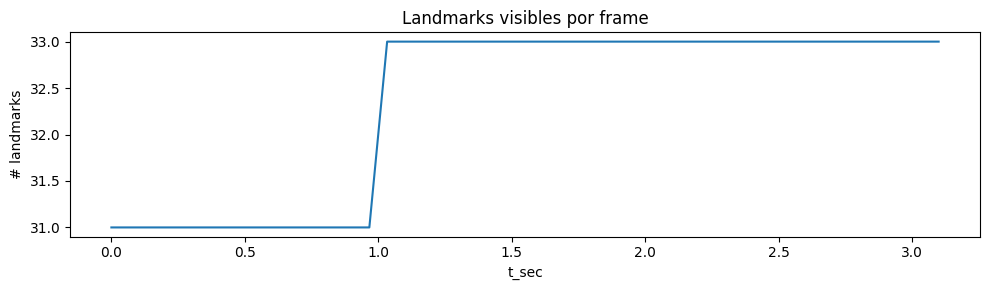

In [39]:
plt.figure(figsize=(10,3))
x = df["t_sec"] if "t_sec" in df.columns else df.index
plt.plot(x, df["visible_landmarks"])
plt.title("Landmarks visibles por frame")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("# landmarks")
plt.tight_layout()
plt.show()


### Utilidades geométricas

In [40]:
def mid_point(ax, ay, bx, by):
    return (ax+bx)/2.0, (ay+by)/2.0

def trunk_inclination(row):
    # usa hombros (11,12) y caderas (23,24)
    try:
        sx1, sy1 = row["x_11"], row["y_11"]
        sx2, sy2 = row["x_12"], row["y_12"]
        hx1, hy1 = row["x_23"], row["y_23"]
        hx2, hy2 = row["x_24"], row["y_24"]
    except KeyError:
        return np.nan

    if any(pd.isna([sx1,sy1,sx2,sy2,hx1,hy1,hx2,hy2])):
        return np.nan

    mx_s, my_s = mid_point(sx1, sy1, sx2, sy2)
    mx_h, my_h = mid_point(hx1, hy1, hx2, hy2)

    # vector cadera->hombro
    vx, vy = mx_s - mx_h, my_s - my_h
    # ángulo respecto a vertical (eje y). Ojo: y de imagen crece hacia abajo.
    # Usamos atan2(dx, dy) para medir inclinación lateral en grados.
    ang_deg = math.degrees(math.atan2(vx, vy))
    return ang_deg  # 0 ~ vertical; +/- indica inclinación lateral

def angle_3pts(ax, ay, bx, by, cx, cy):
    # ángulo ABC (en grados)
    v1 = np.array([ax-bx, ay-by], dtype=float)
    v2 = np.array([cx-bx, cy-by], dtype=float)
    if np.any(np.isnan([*v1, *v2])): return np.nan
    n1 = np.linalg.norm(v1)
    n2 = np.linalg.norm(v2)
    if n1==0 or n2==0: return np.nan
    cosang = np.clip(np.dot(v1, v2)/(n1*n2), -1.0, 1.0)
    return math.degrees(math.acos(cosang))

def knee_angle(row, side="left"):
    # left: (hip=23, knee=25, ankle=27) ; right: (24,26,28)
    if side=="left":
        ids = (23,25,27)
    else:
        ids = (24,26,28)
    ax, ay = row[f"x_{ids[0]}"], row[f"y_{ids[0]}"]
    bx, by = row[f"x_{ids[1]}"], row[f"y_{ids[1]}"]
    cx, cy = row[f"x_{ids[2]}"], row[f"y_{ids[2]}"]
    return angle_3pts(ax, ay, bx, by, cx, cy)


### Series de ángulos

In [41]:
df["trunk_deg"] = df.apply(trunk_inclination, axis=1)
df["knee_left_deg"]  = df.apply(lambda r: knee_angle(r, "left"), axis=1)
df["knee_right_deg"] = df.apply(lambda r: knee_angle(r, "right"), axis=1)

print(df[["trunk_deg","knee_left_deg","knee_right_deg"]].describe())


        trunk_deg  knee_left_deg  knee_right_deg
count   94.000000      94.000000       94.000000
mean   -63.699744     178.130350      173.208722
std    166.830040       1.862585        2.289487
min   -179.959017     172.211102      168.426586
25%   -177.690903     177.727275      172.091569
50%   -176.385684     178.812257      173.061584
75%    178.154082     179.360164      174.778889
max    179.916997     179.950948      177.109441


### Plots angulares

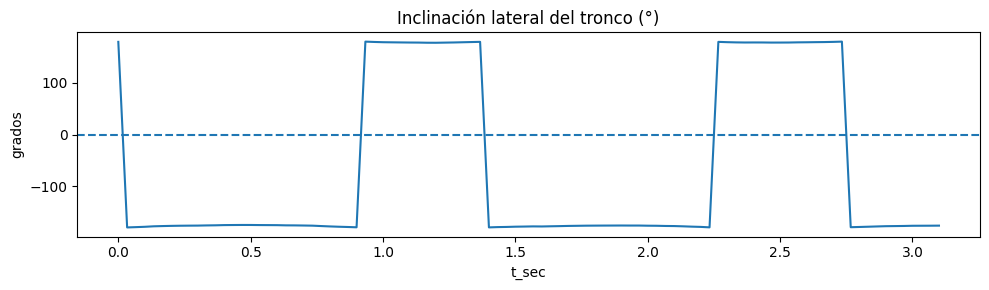

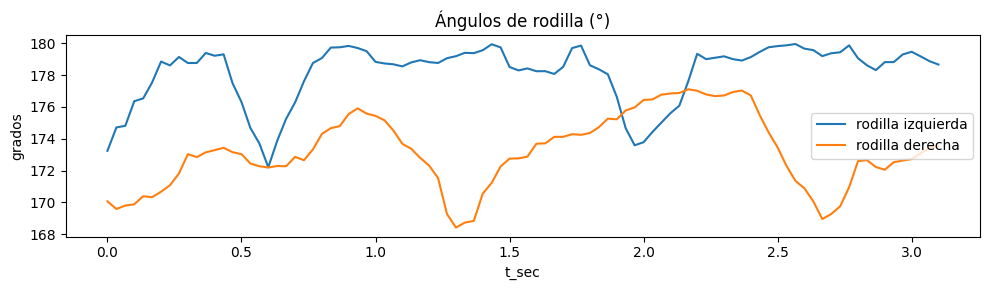

In [42]:
x = df["t_sec"] if "t_sec" in df.columns else df.index

plt.figure(figsize=(10,3))
plt.plot(x, df["trunk_deg"])
plt.axhline(0, linestyle="--")
plt.title("Inclinación lateral del tronco (°)")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("grados")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(x, df["knee_left_deg"], label="rodilla izquierda")
plt.plot(x, df["knee_right_deg"], label="rodilla derecha")
plt.title("Ángulos de rodilla (°)")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("grados")
plt.legend()
plt.tight_layout()
plt.show()


### Velocidad aproximada

count    93.000000
mean      0.430837
std       0.394033
min       0.023254
25%       0.226625
50%       0.350001
75%       0.493787
max       2.278679
Name: speed_norm, dtype: float64


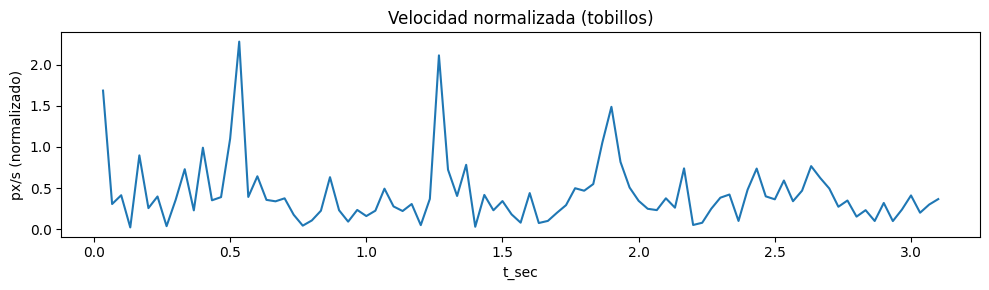

In [43]:
def norm_scale_row(row):
    # distancia vertical hombro-cadera (como escala)
    try:
        _, my_s = mid_point(row["x_11"], row["y_11"], row["x_12"], row["y_12"])
        _, my_h = mid_point(row["x_23"], row["y_23"], row["x_24"], row["y_24"])
    except KeyError:
        return np.nan
    if any(pd.isna([my_s, my_h])): return np.nan
    return abs(my_s - my_h)

# centro de tobillos como proxy de posición
cx = (df["x_27"] + df["x_28"]) / 2.0
cy = (df["y_27"] + df["y_28"]) / 2.0

scale = df.apply(norm_scale_row, axis=1)
dt = np.diff(df["t_sec"].values) if "t_sec" in df.columns else np.ones(len(df)-1)

vx = np.diff(cx) / np.where(dt==0, np.nan, dt)
vy = np.diff(cy) / np.where(dt==0, np.nan, dt)
speed = np.sqrt(vx**2 + vy**2) / scale.iloc[1:].values  # normalizada

df = df.copy()
df.loc[df.index[1:], "speed_norm"] = speed
print(df["speed_norm"].describe())

plt.figure(figsize=(10,3))
plt.plot(x, df["speed_norm"])
plt.title("Velocidad normalizada (tobillos)")
plt.xlabel("t_sec" if "t_sec" in df.columns else "frame")
plt.ylabel("px/s (normalizado)")
plt.tight_layout()
plt.show()


### Resumen por archivo/parquet

In [44]:
parquets = sorted(glob.glob(os.path.join(DRIVE_POSES, "*.parquet")))

def class_from_path(p):
    base = os.path.splitext(os.path.basename(p))[0]
    return base.lower().replace(" ", "_")

def summarize_parquet(p):
    d = pd.read_parquet(p)
    cols_x = [f"x_{i}" for i in range(LM)]
    cols_v = [f"vis_{i}" for i in range(LM) if f"vis_{i}" in d.columns]
    mask = ~d[cols_x].isna().all(axis=1)
    n_frames = len(d)
    with_pose = int(mask.sum())
    if len(cols_v)==LM:
        vis_count = (d[cols_v].fillna(0).values >= 0.5).sum(axis=1)
    else:
        vis_count = (~d[cols_x].isna()).sum(axis=1)
    d["visible_landmarks"] = vis_count
    # ángulos y velocidad (rápido, sin plots)
    d["trunk_deg"] = d.apply(trunk_inclination, axis=1)
    d["knee_left_deg"]  = d.apply(lambda r: knee_angle(r, "left"), axis=1)
    d["knee_right_deg"] = d.apply(lambda r: knee_angle(r, "right"), axis=1)
    # velocidad (versión simple sin normalizar si falta t_sec)
    if "t_sec" in d.columns:
        cx = (d["x_27"] + d["x_28"]) / 2.0
        cy = (d["y_27"] + d["y_28"]) / 2.0
        dt = np.diff(d["t_sec"].values)
        vx = np.diff(cx) / np.where(dt==0, np.nan, dt)
        vy = np.diff(cy) / np.where(dt==0, np.nan, dt)
        speed = np.sqrt(vx**2 + vy**2)
        d.loc[d.index[1:], "speed"] = speed

    return {
        "file": os.path.basename(p),
        "class": class_from_path(p),
        "frames": n_frames,
        "frames_with_pose": with_pose,
        "pose_ratio": with_pose/n_frames if n_frames else np.nan,
        "avg_visible_lm": float(np.nanmean(d["visible_landmarks"])),
        "mean_trunk_deg": float(np.nanmean(d["trunk_deg"])),
        "std_trunk_deg":  float(np.nanstd(d["trunk_deg"])),
        "mean_knee_L":    float(np.nanmean(d["knee_left_deg"])),
        "mean_knee_R":    float(np.nanmean(d["knee_right_deg"])),
        "mean_speed":     float(np.nanmean(d.get("speed", np.nan))),
    }

summ_rows = [summarize_parquet(p) for p in parquets]
summary_df = pd.DataFrame(summ_rows).sort_values(["class","file"])
display(summary_df)


,file,class,frames,frames_with_pose,pose_ratio,avg_visible_lm,mean_trunk_deg,std_trunk_deg,mean_knee_L,mean_knee_R,mean_speed
0,subject1__sit_front__sit_front.parquet,subject1__sit_front__sit_front,94,94,1.000000,33.000000,38.677061,173.393658,145.459030,150.219207,11.065429
1,subject1__sit_side__sit_side.parquet,subject1__sit_side__sit_side,121,121,1.000000,26.000000,-39.230724,158.713045,102.096790,98.054284,42.610601
2,subject1__stand_front__stand_front.parquet,subject1__stand_front__stand_front,207,207,1.000000,32.971014,-62.926600,167.220025,163.460992,167.548061,4.793190
3,subject1__stand_side__stand_side.parquet,subject1__stand_side__stand_side,134,134,1.000000,25.649254,-94.767386,137.380515,114.495906,110.534697,29.907585
4,subject1__walk_back__walk_back.parquet,subject1__walk_back__walk_back,138,132,0.956522,29.347826,-47.280327,170.819534,171.036674,170.299106,76.730661
5,subject1__walking_away__walking_away.parquet,subject1__walking_away__walking_away,169,169,1.000000,32.159763,30.867772,175.263995,171.830246,174.004434,60.376397
6,subject1__walking_to_camera__walking_to_camera...,subject1__walking_to_camera__walking_to_camera,153,153,1.000000,33.000000,-92.479840,150.794169,175.030435,173.467176,79.342957
7,subject2__sit_front__sit_front.parquet,subject2__sit_front__sit_front,97,97,1.000000,32.092784,-42.514908,174.000057,157.542098,163.536101,39.486513
8,subject2__sit_side__sit_side.parquet,subject2__sit_side__sit_side,84,84,1.000000,24.000000,28.952393,157.914299,123.477866,120.499889,35.688752
9,subject2__stand_front__stand_front.parquet,subject2__stand_front__stand_front,73,73,1.000000,32.684932,-36.531059,175.452851,144.679033,152.685494,59.400052


### Agregación por clase

,class,frames,pose_ratio,avg_visible_lm,mean_trunk_deg,mean_knee_L,mean_knee_R,mean_speed
0,subject1__sit_front__sit_front,94,1.000000,33.000000,38.677061,145.459030,150.219207,11.065429
1,subject1__sit_side__sit_side,121,1.000000,26.000000,-39.230724,102.096790,98.054284,42.610601
2,subject1__stand_front__stand_front,207,1.000000,32.971014,-62.926600,163.460992,167.548061,4.793190
3,subject1__stand_side__stand_side,134,1.000000,25.649254,-94.767386,114.495906,110.534697,29.907585
4,subject1__walk_back__walk_back,138,0.956522,29.347826,-47.280327,171.036674,170.299106,76.730661
5,subject1__walking_away__walking_away,169,1.000000,32.159763,30.867772,171.830246,174.004434,60.376397
6,subject1__walking_to_camera__walking_to_camera,153,1.000000,33.000000,-92.479840,175.030435,173.467176,79.342957
7,subject2__sit_front__sit_front,97,1.000000,32.092784,-42.514908,157.542098,163.536101,39.486513
8,subject2__sit_side__sit_side,84,1.000000,24.000000,28.952393,123.477866,120.499889,35.688752
9,subject2__stand_front__stand_front,73,1.000000,32.684932,-36.531059,144.679033,152.685494,59.400052


/tmp/ipython-input-1143051940.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


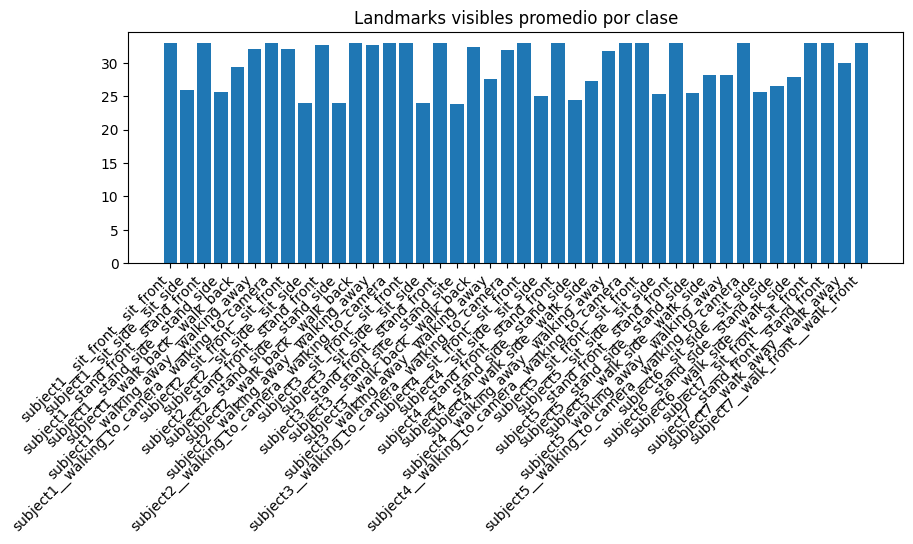

/tmp/ipython-input-1143051940.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(); plt.show()


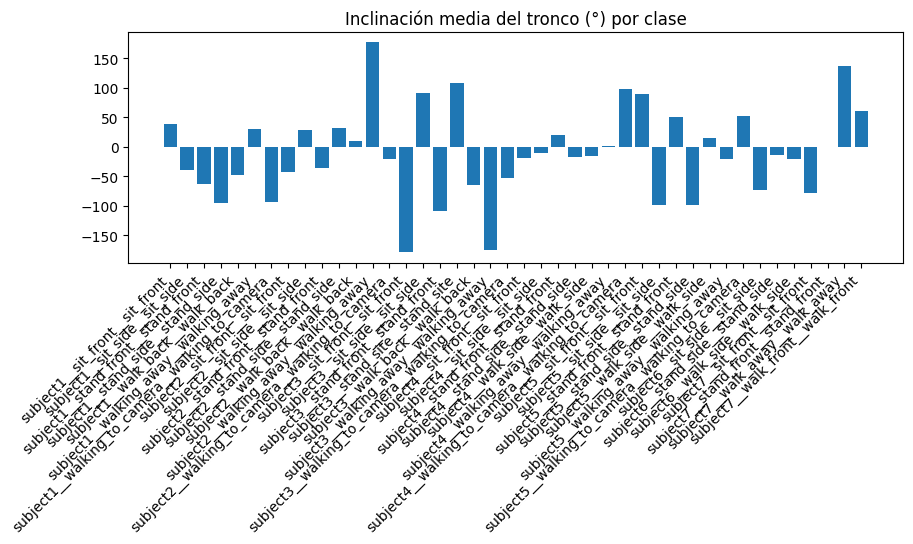

In [45]:
by_class = (summary_df
            .groupby("class")
            .agg(frames=("frames","sum"),
                 pose_ratio=("pose_ratio","mean"),
                 avg_visible_lm=("avg_visible_lm","mean"),
                 mean_trunk_deg=("mean_trunk_deg","mean"),
                 mean_knee_L=("mean_knee_L","mean"),
                 mean_knee_R=("mean_knee_R","mean"),
                 mean_speed=("mean_speed","mean"))
            .reset_index()
           )
display(by_class)

# barras rápidas
plt.figure(figsize=(10,3))
plt.bar(by_class["class"], by_class["avg_visible_lm"])
plt.title("Landmarks visibles promedio por clase")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,3))
plt.bar(by_class["class"], by_class["mean_trunk_deg"])
plt.title("Inclinación media del tronco (°) por clase")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()


### Matriz simple de características para un clasificador

In [46]:
def frames_with_features(p):
    lab = class_from_path(p)
    d = pd.read_parquet(p)
    # visibles
    cols_v = [f"vis_{i}" for i in range(LM) if f"vis_{i}" in d.columns]
    if len(cols_v)==LM:
        vis_count = (d[cols_v].fillna(0).values >= 0.5).sum(axis=1)
    else:
        cols_x = [f"x_{i}" for i in range(LM)]
        vis_count = (~d[cols_x].isna()).sum(axis=1)
    d["visible_landmarks"] = vis_count
    # ángulos
    d["trunk_deg"] = d.apply(trunk_inclination, axis=1)
    d["knee_left_deg"]  = d.apply(lambda r: knee_angle(r, "left"), axis=1)
    d["knee_right_deg"] = d.apply(lambda r: knee_angle(r, "right"), axis=1)
    # velocidad
    if "t_sec" in d.columns:
        cx = (d["x_27"] + d["x_28"]) / 2.0
        cy = (d["y_27"] + d["y_28"]) / 2.0
        dt = np.diff(d["t_sec"].values)
        vx = np.diff(cx) / np.where(dt==0, np.nan, dt)
        vy = np.diff(cy) / np.where(dt==0, np.nan, dt)
        speed = np.sqrt(vx**2 + vy**2)
        d.loc[d.index[1:], "speed"] = speed
    d["class"] = lab
    return d[["visible_landmarks","trunk_deg","knee_left_deg","knee_right_deg","speed","class"]]

frames_df = pd.concat([frames_with_features(p) for p in parquets], ignore_index=True)
print(frames_df.shape)
display(frames_df.head())


(5413, 6)


,visible_landmarks,trunk_deg,knee_left_deg,knee_right_deg,speed,class
0,33,-178.335884,177.426732,178.057596,NaN,subject1__sit_front__sit_front
1,33,-177.872839,178.349072,178.866373,59.015293,subject1__sit_front__sit_front
2,33,-177.153552,178.555637,179.813176,50.837443,subject1__sit_front__sit_front
3,33,-177.084944,177.001071,179.916508,9.736296,subject1__sit_front__sit_front
4,33,-176.445303,174.243972,178.840773,12.165077,subject1__sit_front__sit_front


### Entrega #2

### Preparación de los datos

* Normalización (independiente del tamaño/distancia de cámara)

* Filtrado (suavizado para quitar ruido)

* Generación de características: velocidades, ángulos relativos y inclinación del tronco

* Ventanado + agregación para dejar un dataset final por ventana listo para SVM/RF




### Helpers básicos

In [47]:
L_SHOULDER, R_SHOULDER = 11, 12
L_ELBOW,    R_ELBOW    = 13, 14
L_WRIST,    R_WRIST    = 15, 16
L_HIP,      R_HIP      = 23, 24
L_KNEE,     R_KNEE     = 25, 26
L_ANKLE,    R_ANKLE    = 27, 28

def load_parquet(path):
    return pq.read_table(path).to_pandas()

### 1. Limpieza , normalización y suavizado

In [48]:
def normalize_coords(df: pd.DataFrame) -> pd.DataFrame:
    """x,y a [0,1] para eliminar dependencia de resolución/cámara."""
    w = df['width'].astype(float).replace(0, np.nan)
    h = df['height'].astype(float).replace(0, np.nan)
    for i in range(33):
        df[f'x_{i}'] = df[f'x_{i}'] / w
        df[f'y_{i}'] = df[f'y_{i}'] / h
    return df

def filter_low_visibility(df: pd.DataFrame, thr=0.3) -> pd.DataFrame:
    """Descarta frames con visibilidad promedio baja."""
    vis_cols = [f'vis_{i}' for i in range(33)]
    mask = df[vis_cols].mean(axis=1) >= thr
    return df.loc[mask].reset_index(drop=True)

def smooth_coords(df: pd.DataFrame, win=5) -> pd.DataFrame:
    """Suavizado simple por media móvil (no requiere SciPy)."""
    for i in range(33):
        df[f'x_{i}'] = df[f'x_{i}'].rolling(win, center=True, min_periods=1).mean()
        df[f'y_{i}'] = df[f'y_{i}'].rolling(win, center=True, min_periods=1).mean()
    return df

def center_by_pelvis(df: pd.DataFrame) -> pd.DataFrame:
    """Centra el esqueleto restando el punto medio de caderas (invariante a traslación)."""
    mid_hip_x = (df[f'x_{L_HIP}'] + df[f'x_{R_HIP}'])/2
    mid_hip_y = (df[f'y_{L_HIP}'] + df[f'y_{R_HIP}'])/2
    for i in range(33):
        df[f'x_{i}'] = df[f'x_{i}'] - mid_hip_x
        df[f'y_{i}'] = df[f'y_{i}'] - mid_hip_y
    return df

def clean_pose_df(df: pd.DataFrame,
                  vis_thr=0.3,
                  smooth_win=5,
                  use_centering=True) -> pd.DataFrame:
    """Pipeline de preparación cruda: filtra, normaliza, suaviza y centra opcionalmente."""
    df = filter_low_visibility(df, thr=vis_thr)
    if len(df) == 0:
        return df
    df = normalize_coords(df)
    df = smooth_coords(df, win=smooth_win)
    if use_centering:
        df = center_by_pelvis(df)
    return df


###2.  Calculo de angulos e inclinación de tronco

Tener en cuenta que hay 2 tipos de funciones definidas con nombres similares, lo que ocurre es que unas se utilizaron para visualización y en esta parte se reescriben dichas funciones pero para funcionalidades.

In [49]:
# --- VERSIONES VECTORIALES (para features)
def angle_3pts(ax, ay, bx, by, cx, cy):
    """Ángulo ABC vectorizado en grados [0,180]. ax,ay,... pueden ser Series/arrays."""
    ba_x, ba_y = ax - bx, ay - by
    bc_x, bc_y = cx - bx, cy - by
    num = (ba_x*bc_x + ba_y*bc_y)
    den = np.sqrt(ba_x**2 + ba_y**2) * (np.sqrt(bc_x**2 + bc_y**2) + 1e-9) + 1e-9
    cosang = np.clip(num / den, -1.0, 1.0)
    return np.degrees(np.arccos(cosang))

def angle_joint(df, a, b, c, outname):
    ax, ay = df[f'x_{a}'], df[f'y_{a}']
    bx, by = df[f'x_{b}'], df[f'y_{b}']
    cx, cy = df[f'x_{c}'], df[f'y_{c}']
    df[outname] = angle_3pts(ax, ay, bx, by, cx, cy)
    return df

def trunk_inclination_abs(df, outname='trunk_incl_deg'):
    """
    Magnitud de inclinación (sin signo) entre pelvis→hombros y eje vertical.
    """
    mid_sh_x = (df[f'x_{L_SHOULDER}'] + df[f'x_{R_SHOULDER}'])/2
    mid_sh_y = (df[f'y_{L_SHOULDER}'] + df[f'y_{R_SHOULDER}'])/2
    mid_hip_x = (df[f'x_{L_HIP}'] + df[f'x_{R_HIP}'])/2
    mid_hip_y = (df[f'y_{L_HIP}'] + df[f'y_{R_HIP}'])/2
    vx, vy = mid_sh_x - mid_hip_x, mid_sh_y - mid_hip_y
    # ángulo con vertical (0,1): cos(theta) = vy/||v||
    norm = np.sqrt(vx**2 + vy**2) + 1e-9
    cosang = np.clip(vy / norm, -1.0, 1.0)
    df[outname] = np.degrees(np.arccos(cosang))
    return df


### 3. Velocidades en puntos clave

In [50]:
def add_velocities(df: pd.DataFrame, cols_points, fps_col='fps') -> pd.DataFrame:
    """Velocidad (pixeles normalizados/seg) para puntos clave."""
    fps = float(df[fps_col].iloc[0]) if fps_col in df.columns else 30.0
    for i in cols_points:
        vx = df[f'x_{i}'].diff() * fps
        vy = df[f'y_{i}'].diff() * fps
        df[f'vel_{i}'] = np.sqrt(vx**2 + vy**2).fillna(0.0)
    return df


### 4. Features por frame + Ventanas con agregación

In [51]:
def build_frame_features(df: pd.DataFrame) -> pd.DataFrame:
    """Crea columnas de ángulos (codo, rodilla, cadera), inclinación y velocidades."""
    # Ángulos
    df = angle_joint(df, L_SHOULDER, L_ELBOW, L_WRIST,  'ang_left_elbow')
    df = angle_joint(df, R_SHOULDER, R_ELBOW, R_WRIST,  'ang_right_elbow')
    df = angle_joint(df, L_HIP,      L_KNEE,  L_ANKLE,  'ang_left_knee')
    df = angle_joint(df, R_HIP,      R_KNEE,  R_ANKLE,  'ang_right_knee')
    df = angle_joint(df, L_SHOULDER, L_HIP,   L_KNEE,   'ang_left_hip')
    df = angle_joint(df, R_SHOULDER, R_HIP,   R_KNEE,   'ang_right_hip')

    # Inclinación (dos variantes): tu columna con signo para gráficas y la absoluta para ML
    df['trunk_deg'] = df.apply(trunk_inclination, axis=1)  # CON signo (visualización)
    df = trunk_inclination_abs(df, 'trunk_incl_deg')               # ABSOLUTA (feature)

    # Velocidades
    df = add_velocities(df, cols_points=[L_WRIST, R_WRIST, L_ANKLE, R_ANKLE, L_HIP, R_HIP])

    return df

def window_aggregate(df: pd.DataFrame, win=32, stride=16, keep_cols=()):
    """
    Ventanas deslizantes y stats (mean,std,min,max) de las features.
    Devuelve lista de dicts (una fila por ventana).
    """
    feats_cols = [c for c in df.columns if c.startswith(('ang_', 'trunk_incl_', 'vel_'))]
    rows = []
    start = 0
    while start + win <= len(df):
        seg = df.iloc[start:start+win]
        agg = seg[feats_cols].agg(['mean','std','min','max']).T
        row = {f"{r}_{stat}": agg.loc[r, stat] for r in agg.index for stat in ('mean','std','min','max')}
        row['frame_start'] = int(seg['frame_idx'].iloc[0]) if 'frame_idx' in seg else start
        row['frame_end']   = int(seg['frame_idx'].iloc[-1]) if 'frame_idx' in seg else start+win-1
        for c in keep_cols:
            row[c] = seg[c].iloc[0]
        rows.append(row)
        start += stride
    return rows


In [52]:
FEATURES_CSV = os.path.join(DRIVE_POSES, "features_dataset.csv")

def parse_subject_action_from_name(parquet_path: str):
    name = Path(parquet_path).stem
    parts = name.split("__")
    if len(parts) >= 2:
        return parts[0], parts[1]
    return "unknown", name

all_rows = []
parquets = sorted(glob.glob(os.path.join(DRIVE_POSES, "*.parquet")))
print(f"Parquets detectados: {len(parquets)}")

for pq_path in parquets:
    df = load_parquet(pq_path)
    if len(df) < 10:
        continue

    # 1) Limpieza/normalización/suavizado
    df = clean_pose_df(df, vis_thr=0.3, smooth_win=5, use_centering=True)
    if len(df) < 32:
        continue

    # 2) Features por frame (incluye trunk_deg con signo y trunk_incl_deg absoluto)
    df = build_frame_features(df)

    # 3) Ventanas y agregación
    subject, action = parse_subject_action_from_name(pq_path)
    rows = window_aggregate(df, win=32, stride=16, keep_cols=('fps',))
    for r in rows:
        r['subject'] = subject
        r['action']  = action
        r['source']  = os.path.basename(pq_path)
    all_rows.extend(rows)

features_df = pd.DataFrame(all_rows)
features_df.to_csv(FEATURES_CSV, index=False)
print("Dataset de features guardado en:", FEATURES_CSV)
features_df.head()


Parquets detectados: 42


/tmp/ipython-input-525744240.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[outname] = angle_3pts(ax, ay, bx, by, cx, cy)
/tmp/ipython-input-525744240.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[outname] = angle_3pts(ax, ay, bx, by, cx, cy)
/tmp/ipython-input-525744240.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

Dataset de features guardado en: /content/drive/.shortcut-targets-by-id/1FaYueZhUWw_YKYWeT8A9WdoOnLNHlD9q/proyecto/poses/features_dataset.csv


/tmp/ipython-input-525744240.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[outname] = angle_3pts(ax, ay, bx, by, cx, cy)
/tmp/ipython-input-525744240.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[outname] = angle_3pts(ax, ay, bx, by, cx, cy)
/tmp/ipython-input-525744240.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmen

,ang_left_elbow_mean,ang_left_elbow_std,ang_left_elbow_min,ang_left_elbow_max,ang_right_elbow_mean,ang_right_elbow_std,ang_right_elbow_min,ang_right_elbow_max,ang_left_knee_mean,ang_left_knee_std,...,vel_24_mean,vel_24_std,vel_24_min,vel_24_max,frame_start,frame_end,fps,subject,action,source
0,169.718511,5.141493,161.611400,179.764950,154.754099,6.688521,141.956815,161.190864,164.930179,15.740502,...,0.031833,0.036981,0.000000,0.126642,0,31,30.182820,subject1,sit_front,subject1__sit_front__sit_front.parquet
1,164.387404,13.332001,135.511330,179.764950,144.056240,10.008632,121.399904,158.869177,164.503379,15.202019,...,0.010490,0.007667,0.001463,0.028541,16,47,30.182820,subject1,sit_front,subject1__sit_front__sit_front.parquet
2,128.613402,29.698717,90.841253,172.287957,120.432402,19.506166,95.362525,148.220885,132.294011,23.518729,...,0.008034,0.003771,0.002900,0.016990,32,63,30.182820,subject1,sit_front,subject1__sit_front__sit_front.parquet
3,101.213870,8.809520,90.841253,130.309233,103.980294,5.311387,95.362525,118.230320,103.622149,9.027517,...,0.005719,0.003458,0.000272,0.014028,48,79,30.182820,subject1,sit_front,subject1__sit_front__sit_front.parquet
4,133.183092,21.048361,87.110700,158.745577,127.811935,28.016856,68.477301,154.974512,127.355539,30.690007,...,0.013825,0.008813,0.000000,0.038197,0,31,29.564423,subject1,sit_side,subject1__sit_side__sit_side.parquet


## Construccion de modelos

### 1. Cargar el dataset y preparar X , y , groups

In [5]:
df = pd.read_csv("/content/drive/MyDrive/proyecto/poses/features_dataset.csv")
print(df.shape)
print(df[['subject','action']].drop_duplicates().sort_values('subject').head(10))

(277, 58)
     subject             action
0   subject1          sit_front
4   subject1           sit_side
10  subject1        stand_front
21  subject1         stand_side
28  subject1          walk_back
35  subject1       walking_away
44  subject1  walking_to_camera
77  subject2  walking_to_camera
72  subject2       walking_away
67  subject2          walk_back


In [17]:
assert {'subject','action'}.issubset(df.columns), "El CSV debe tener columnas subject y action."

# Etiquetas y grupos
groups = df['subject'].astype(str).values
y_str  = df['action'].astype(str).values

# Features numéricas (excluye metadatos)
drop_cols = [c for c in ['subject','action','source'] if c in df.columns]
X = df.drop(columns=drop_cols).select_dtypes(include=[np.number]).copy()

le = LabelEncoder()
y = le.fit_transform(y_str)
classes = list(le.classes_)

print("X:", X.shape, "| y:", y.shape, "| #subjects:", len(np.unique(groups)))
print("Clases:", classes)

X: (277, 55) | y: (277,) | #subjects: 7
Clases: ['sit_front', 'sit_side', 'stand_front', 'stand_side', 'stand_site', 'walk_away', 'walk_back', 'walk_front', 'walk_side', 'walking_away', 'walking_to_camera']


###

### 2. Definir validación (LOSO) y scoring

In [18]:
logo = LeaveOneGroupOut()

scorers = {
    "accuracy": make_scorer(accuracy_score),
    "balanced_accuracy": make_scorer(balanced_accuracy_score),
    "f1_macro": make_scorer(f1_score, average="macro"),
    "precision_macro": make_scorer(precision_score, average="macro", zero_division=0),
    "recall_macro": make_scorer(recall_score, average="macro", zero_division=0),
    "mcc": make_scorer(matthews_corrcoef),
    "kappa": make_scorer(cohen_kappa_score),
}
# Nota: R^2 es para REGRESIÓN; no aplica en clasificación multiclase.


### 3. Modelos , pipelines y grids

In [19]:
models = {
    "SVM_RBF": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))
    ]),
    "RandomForest": RandomForestClassifier(
        n_jobs=-1, class_weight="balanced_subsample", random_state=42
    ),
}

param_grids = {
    "SVM_RBF": {
        "clf__C": [1, 3, 10],
        "clf__gamma": ["scale", 0.05, 0.01],
    },
    "RandomForest": {
        "n_estimators": [300, 600],
        "max_depth": [None, 12, 20],
        "max_features": ["sqrt", 0.5],
        "min_samples_leaf": [1, 2],
    },
}


### 4. GridSearchSV con LOSO para cada modelo

In [20]:
results = []

for name, est in models.items():
    print(f"\n=== GridSearch {name} ===")
    grid = GridSearchCV(
        estimator=est,
        param_grid=param_grids[name],
        scoring=scorers,          # multi-métrica
        refit="f1_macro",         # el mejor se elige por F1 macro (puedes cambiarlo a 'balanced_accuracy' si prefieres)
        cv=logo.split(X, y, groups=groups),
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X, y)

    best_idx = grid.best_index_
    row = {
        "model": name,
        "best_params": grid.best_params_,
        "best_f1_macro": grid.cv_results_["mean_test_f1_macro"][best_idx],
        "best_accuracy": grid.cv_results_["mean_test_accuracy"][best_idx],
        "best_bal_acc": grid.cv_results_["mean_test_balanced_accuracy"][best_idx],
        "best_precision": grid.cv_results_["mean_test_precision_macro"][best_idx],
        "best_recall": grid.cv_results_["mean_test_recall_macro"][best_idx],
        "best_mcc": grid.cv_results_["mean_test_mcc"][best_idx],
        "best_kappa": grid.cv_results_["mean_test_kappa"][best_idx],
        "best_estimator": grid.best_estimator_,
    }
    print("Mejor F1 macro:", row["best_f1_macro"])
    print("Mejores params:", row["best_params"])
    results.append(row)

rank_df = pd.DataFrame([{k:v for k,v in r.items() if k!="best_estimator"} for r in results])\
            .sort_values("best_f1_macro", ascending=False)
rank_df



=== GridSearch SVM_RBF ===
Mejor F1 macro: 0.40903120770482587
Mejores params: {'clf__C': 3, 'clf__gamma': 0.05}

=== GridSearch RandomForest ===
Mejor F1 macro: 0.4065601290864548
Mejores params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 300}


,model,best_params,best_f1_macro,best_accuracy,best_bal_acc,best_precision,best_recall,best_mcc,best_kappa
0,SVM_RBF,"{'clf__C': 3, 'clf__gamma': 0.05}",0.409031,0.518929,0.538424,0.462266,0.421136,0.474330,0.447296
1,RandomForest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.406560,0.493946,0.506606,0.450086,0.421496,0.452763,0.425744



=== LOSO final (re-entrenando por sujeto) ===
Accuracy: 0.5667870036101083
Balanced Acc: 0.382635531425854
F1 macro: 0.36935720719649184
Precision macro: 0.3794254192278141
Recall macro: 0.382635531425854
MCC: 0.5051349066197843
Kappa: 0.4994202069183622

--- Reporte por clase ---
                   precision    recall  f1-score   support

        sit_front      0.706     0.500     0.585        24
         sit_side      0.484     0.968     0.645        31
      stand_front      0.571     0.387     0.462        31
       stand_side      0.724     0.700     0.712        30
       stand_site      0.000     0.000     0.000         2
        walk_away      0.000     0.000     0.000         6
        walk_back      0.000     0.000     0.000        16
       walk_front      0.000     0.000     0.000         6
        walk_side      0.814     0.919     0.864        62
     walking_away      0.407     0.297     0.344        37
walking_to_camera      0.467     0.438     0.452        32

       

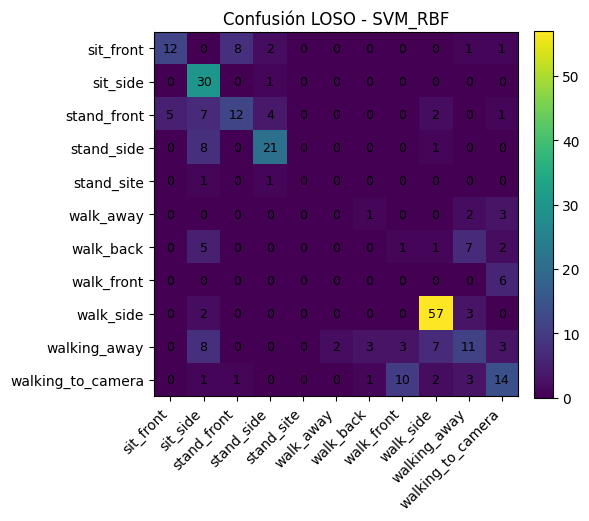

In [22]:
def loso_eval(best_model_name: str):
    conf = [r for r in results if r["model"] == best_model_name][0]
    best_params = conf["best_params"]
    base_est = models[best_model_name]

    y_true_all, y_pred_all = [], []

    for train_idx, test_idx in logo.split(X, y, groups=groups):
        est = clone(base_est)
        if best_model_name == "SVM_RBF":
            est.set_params(**{f"clf__{k.split('__')[-1]}": v for k, v in best_params.items()})
        else:
            est.set_params(**best_params)

        est.fit(X.iloc[train_idx], y[train_idx])
        preds = est.predict(X.iloc[test_idx])
        y_true_all.extend(y[test_idx]); y_pred_all.extend(preds)

    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)

    print("\n=== LOSO final (re-entrenando por sujeto) ===")
    print("Accuracy:", accuracy_score(y_true_all, y_pred_all))
    print("Balanced Acc:", balanced_accuracy_score(y_true_all, y_pred_all))
    print("F1 macro:", f1_score(y_true_all, y_pred_all, average="macro"))
    print("Precision macro:", precision_score(y_true_all, y_pred_all, average="macro", zero_division=0))
    print("Recall macro:", recall_score(y_true_all, y_pred_all, average="macro", zero_division=0))
    print("MCC:", matthews_corrcoef(y_true_all, y_pred_all))
    print("Kappa:", cohen_kappa_score(y_true_all, y_pred_all))

    print("\n--- Reporte por clase ---")
    print(classification_report(y_true_all, y_pred_all, target_names=classes, digits=3, zero_division=0))

    cm = confusion_matrix(y_true_all, y_pred_all)
    return cm

best_name = rank_df.iloc[0]["model"]
cm = loso_eval(best_name)

# Plot matriz de confusión
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title(f"Confusión LOSO - {best_name}")
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_xticks(range(len(classes))); ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticks(range(len(classes))); ax.set_yticklabels(classes)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', fontsize=9)
plt.tight_layout(); plt.show()
